In [4]:

import pandas as pd
import cufflinks as cf
import requests
import io
import numpy as np 

# matplotlib
import matplotlib.pyplot as plt


In [ ]:
pip install plotly==3.10.0

In [206]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

<h2>Download and collecting the trade Import data </h2>
    
<h5>data derived from United Nations Statistics Division
<br>official source:    https://comtrade.un.org/Data/    
<br>email: comtrade@un.org 

In [185]:
##raw import data 2019
url19 = "https://raw.githubusercontent.com/bulattoolpix/SITC/main/comtrade%20(19FPART).csv" 
url19_1 = "https://raw.githubusercontent.com/bulattoolpix/SITC/main/comtrade%20(19_SecPart).csv" 
download19 = requests.get(url19_1,url19).content

##raw import data 2020
url20 = "https://raw.githubusercontent.com/bulattoolpix/SITC/main/20SPART.csv" 
url20_2 ='https://raw.githubusercontent.com/bulattoolpix/SITC/main/comtrade%20(20_secprt).csv'
url20_3 ='https://raw.githubusercontent.com/bulattoolpix/SITC/main/20FPART.csv'
url20_4='https://raw.githubusercontent.com/bulattoolpix/SITC/main/2020_SITC_ADD.csv'
download20= requests.get(url20,url20_2).content
download20_= requests.get(url20_3,url20_4).content

##raw import data 2021
url21 = 'https://raw.githubusercontent.com/bulattoolpix/SITC/main/comtrade%20(21FPART).csv'
url21_2 = 'https://raw.githubusercontent.com/bulattoolpix/SITC/main/comtrade%20(21SPART).csv'
url21_3 = 'https://raw.githubusercontent.com/bulattoolpix/SITC/main/comtrade%20(21_secpart).csv'
url21_4 = 'https://raw.githubusercontent.com/bulattoolpix/SITC/main/2021_SITC_ADD.csv'
download21  = requests.get(url21,url21_2).content
download21_ = requests.get(url21_3,url21_4).content


# Reading the downloaded content and turning it into a pandas dataframe
t19   = pd.read_csv(io.StringIO(download19.decode('utf-8')))
t20   = pd.read_csv(io.StringIO(download20.decode('utf-8')))
t20_2   = pd.read_csv(io.StringIO(download20_.decode('utf-8')))
t21   = pd.read_csv(io.StringIO(download21.decode('utf-8')))
t21_2   = pd.read_csv(io.StringIO(download21_.decode('utf-8')))

##concatting
import19 = pd.concat([t19]).drop_duplicates().reset_index(drop=True)
import20 = pd.concat([t20,t20_2]).drop_duplicates().reset_index(drop=True)
import21 = pd.concat([t21,t21_2]).drop_duplicates().reset_index(drop=True)

##select Import flows only
import19 = import19.loc[import19['Trade Flow'] == 'Import'].drop_duplicates()
import20 = import20.loc[import20['Trade Flow'] == 'Import'].drop_duplicates()
import21 = import20.loc[import20['Trade Flow'] == 'Import'].drop_duplicates()

In [212]:
import19.head(2)

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag,prod_import,world_import,rca
0,S4,2019,2019,2019,4,1,1,Import,4,Afghanistan,...,NaN,19275.0,NaN,15335,NaN,NaN,0,6094740669,18672617313887,7.572347e+14
1,S4,2019,2019,2019,4,1,1,Import,24,Angola,...,NaN,11010.0,NaN,92477,NaN,NaN,6,6094740669,18672617313887,7.572347e+14


In [196]:
##raw import overall amt $ 
rus = "https://raw.githubusercontent.com/bulattoolpix/SITC/main/Rus_voll.csv" 
drus= requests.get(rus).content
world_19 = "https://raw.githubusercontent.com/bulattoolpix/SITC/main/comtrade%20(2019_World_all).csv" 
d_19 = requests.get(world_19).content
world_20 = "https://raw.githubusercontent.com/bulattoolpix/SITC/main/comtrade%20(2020_World_all).csv" 
d_20 = requests.get(world_20).content
world_21 = "https://raw.githubusercontent.com/bulattoolpix/SITC/main/comtrade%20(2021_World_all).csv" 
d_21 = requests.get(world_21).content
rcomp='https://raw.githubusercontent.com/bulattoolpix/SITC/main/rcacomp.csv'
rus = pd.read_csv(io.StringIO(drus.decode('utf-8')))

world19 = pd.read_csv(io.StringIO(d_19.decode('utf-8')))
world20 = pd.read_csv(io.StringIO(d_20.decode('utf-8')))
world21 = pd.read_csv(io.StringIO(d_21.decode('utf-8')))

In [197]:
world19 .head(2)

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,S4,2019,2019,2019,0,0,1,Import,4,Afghanistan,...,0,NaN,NaN,NaN,NaN,NaN,8568013876,NaN,NaN,4
1,S4,2019,2019,2019,0,0,2,Export,4,Afghanistan,...,0,NaN,NaN,NaN,0.0,NaN,870488512,NaN,NaN,4


<h3>Calculating Trade Value by Commodity Code and RCA

In [198]:
import19 ["prod_import"]=import19 [['Commodity Code', 'Trade Value (US$)']].groupby(by=["Commodity Code"]).transform(np.sum)
import20 ["prod_import"]=import20 [['Commodity Code', 'Trade Value (US$)']].groupby(by=["Commodity Code"]).transform(np.sum)
import21 ["prod_import"]=import21[['Commodity Code', 'Trade Value (US$)']].groupby(by=["Commodity Code"]).transform(np.sum)

import19 ["world_import"]=world19.loc[world19['Trade Flow'] == 'Import']['Trade Value (US$)'].sum()
import20 ["world_import"]=world20.loc[world20['Trade Flow'] == 'Import']['Trade Value (US$)'].sum()
import21 ["world_import"]=world21.loc[world21['Trade Flow'] == 'Import']['Trade Value (US$)'].sum()


In [199]:

import19['rca']=rus['Trade Value (US$)'].loc[(rus['Trade Flow'] == 'Import') & (rus['Year'] == 2019)].values[0]/(import19["prod_import"] / import19["world_import"])
import20['rca']=rus['Trade Value (US$)'].loc[(rus['Trade Flow'] == 'Import') & (rus['Year'] == 2020)].values[0]/(import20["prod_import"] / import20["world_import"])
import21['rca']=rus['Trade Value (US$)'].loc[(rus['Trade Flow'] == 'Import') & (rus['Year'] == 2021)].values[0]/(import21["prod_import"] / import21["world_import"])


In [204]:
import20ru=import20.loc[(import20['Reporter']=='Russian Federation')]
import20ru.columns
import20ru=import20.loc[(import20['Reporter']=='Russian Federation')].drop_duplicates()
import20ru.rename(columns={'Commodity Code':'SITC'}, inplace=True)
import20ru=import20ru.sort_values(by=([ 'SITC']),ascending=True)
import20ru['rca']=import21ru['rca']/1.e+15
import20ru['Commodity'] =  import20ru['Commodity'].str.slice(0, 40)

import19ru=import19.loc[(import19['Reporter']=='Russian Federation')].drop_duplicates()
import19ru.rename(columns={'Commodity Code':'SITC'}, inplace=True)
import19ru=import19ru.sort_values(by=([ 'SITC']),ascending=True)
import19ru['rca']=import21ru['rca']/1.e+15
import19ru['Commodity'] =  import19ru['Commodity'].str.slice(0, 30)   

import21ru=import21.loc[(import21['Reporter']=='Russian Federation')].drop_duplicates()
import21ru.rename(columns={'Commodity Code':'SITC'}, inplace=True)
import21ru['rca']=import21ru['rca']/1.e+15
import21ru=import21ru.sort_values(by=([ 'SITC']),ascending=True)    
import21ru['Commodity'] =  import21ru['Commodity'].str.slice(0, 40) 

In [211]:
import21ru.head(2)

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag,prod_import,world_import,rca
105,S4,2020,2020,2020,4,1,1,Import,643,Russian Federation,...,NaN,19868637.0,NaN,4481086,NaN,NaN,6,4959190919,21327032580906,1.262186
387,S4,2020,2020,2020,4,0,1,Import,643,Russian Federation,...,NaN,11823890.0,NaN,91602441,NaN,NaN,0,3623289538,21327032580906,1.727552


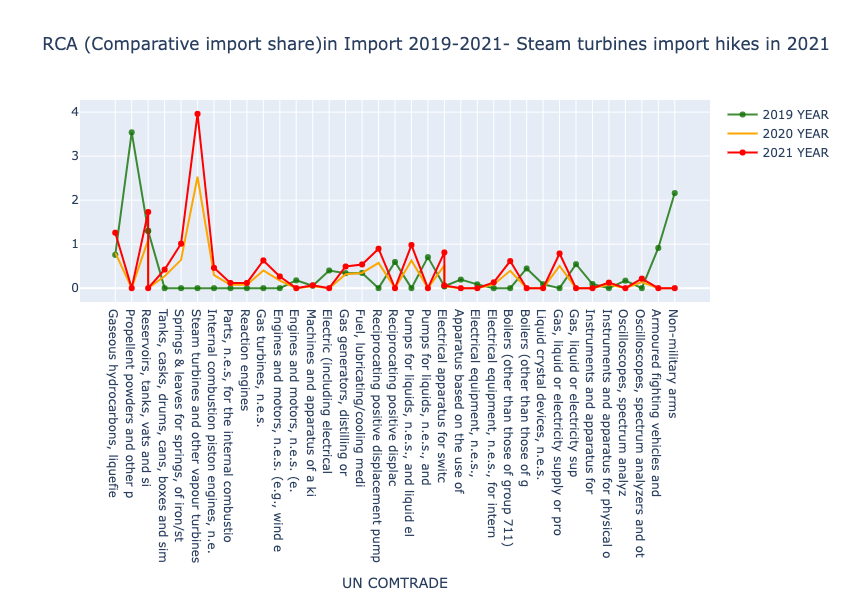

In [210]:
rcomp='https://raw.githubusercontent.com/bulattoolpix/SITC/main/rcacomp.csv'
rc = requests.get(rcomp).content
imports   = pd.read_csv(io.StringIO(rc.decode('utf-8')))
imports=imports.sort_values(by=([ 'SITC']),ascending=True)

trace1 = go.Scatter(
                    y=imports.rca/1.e+15,  x=imports.Commodity, mode = "lines+markers",
                    name = "2019 YEAR",marker = dict(color = 'rgba(16, 112, 2, 0.8)')
                    )

trace2 = go.Scatter(
                   y=imports.rca20/1.e+15,  x=imports.Commodity, mode = "lines",name = "2020 YEAR",
                   marker = dict(color = 'ORANGE'),text= import21.Commodity)
trace3 = go.Scatter(
                     y=imports.rca21/1.e+15,  x=imports.Commodity, mode = "markers+lines",
                    name = "2021 YEAR",marker = dict(color = 'red')
                    )
data = [ trace1,trace2, trace3]
layout1 = cf.Layout(title = 'RCA (Comparative import share)in Import 2019-2021- Steam turbines import hikes in 2021 ',
    height=600, width=800,  xaxis= dict(title= 'UN COMTRADE',ticklen= 5,zeroline= False)
)
fig = dict(data = data, layout = layout1)
iplot(fig)


In [10]:
##pip install google.colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 531.7 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 kB 2.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.9/758.9 kB 3.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 23.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 31.4 MB/s eta 0:00:0000:010:01m
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.2/484.2 kB 31.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.4/245.4 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 

<h2><span style="color:orange">MATCHMAKING</span></h2>
 
Сопоставление представленных импортируемых товаров с изобретениями 

In [250]:
rcomp='https://raw.githubusercontent.com/bulattoolpix/SITC/main/rcacomp.csv'
rc = requests.get(rcomp).content
imports   = pd.read_csv(io.StringIO(rc.decode('utf-8')))
imports=imports.sort_values(by=([ 'SITC']),ascending=True)
imports2=imports[['rca21','SITC21']]
url='https://raw.githubusercontent.com/bulattoolpix/SITC/main/matcher.csv'
nn = requests.get(url).content
matcher= pd.read_csv(io.StringIO(nn.decode('utf-8')))
matcher=matcher.fillna(0)
matcher['sitc code']=matcher['sitc code'].astype(int)
matcher.columns= matcher.columns.str.replace('sitc code','sitc')
matcher.columns= matcher.columns.str.replace('rca sitc','rca_ex')
imports2.columns= imports2.columns.str.replace('SITC21','sitc')
matcher = matcher.merge(imports2,on='sitc',how="left")
matcher['rca21']=matcher['rca21']/1.e+15
matcher=matcher.fillna(0)
matcher.head(5)

,RTA_PATENT,code_PATENT,Description,sitc,rca_ex,Sits Description,rca21
0,2.612012,F01B,"MACHINES OR ENGINES, IN GENERAL OR OF POSITIVE...",7138,0.104644,"Internal combustion piston engines, n.e.s.",0.461
1,3.042707,F01C,ROTARY-PISTON OR OSCILLATING-PISTON MACHINES O...,7139,0.093296,"Parts, n.e.s, for the internal combustion pist...",0.118
2,1.361535,F01K,STEAM ENGINE PLANTS; STEAM ACCUMULATORS; ENGIN...,7121,1.174106,Steam turbines and other vapour turbines,3.960
3,1.097151,F02B,INTERNAL-COMBUSTION PISTON ENGINES; COMBUSTION...,7138,0.104644,"Internal combustion piston engines, n.e.s.",0.461
4,1.412947,F02C,GAS-TURBINE PLANTS; AIR INTAKES FOR JET-PROPUL...,7148,0.483259,"Gas turbines, n.e.s.",0.630


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



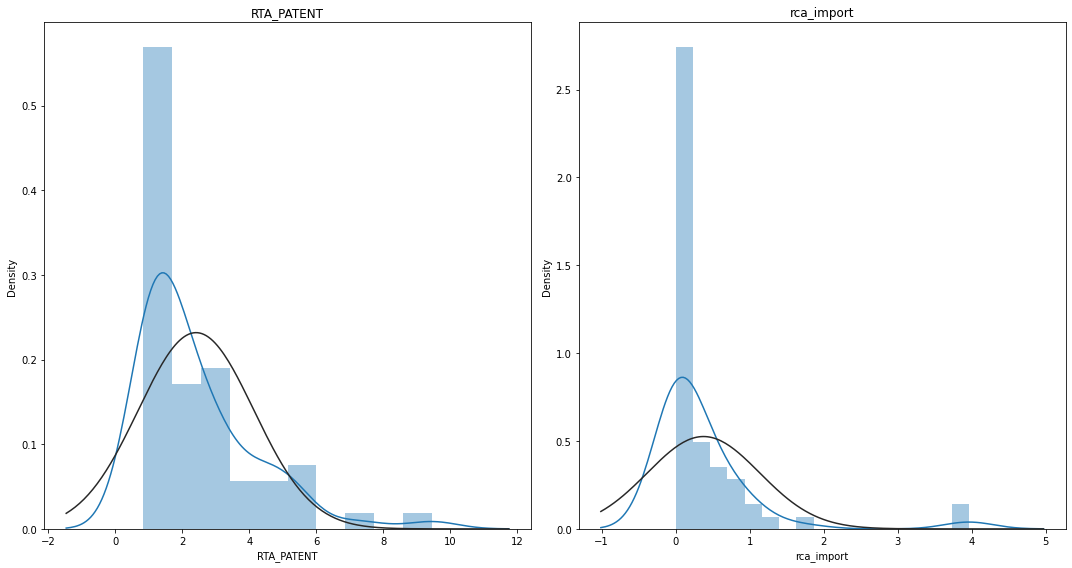

In [251]:
matcher.columns= matcher.columns.str.replace('rca21','rca_import')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
from scipy.stats import norm 
graph_by_variables = ['RTA_PATENT','rca_import']
plt.figure(figsize=(15,8))

for i in range(0,2):
    plt.subplot(1,2,i+1)
    sns.distplot(matcher[graph_by_variables[i]].dropna(),fit=norm)
    plt.title(graph_by_variables[i])

plt.tight_layout()

<H3> Выявление связи между Изобретательской активностью и  Импортом ( в сравнении с экспортом)

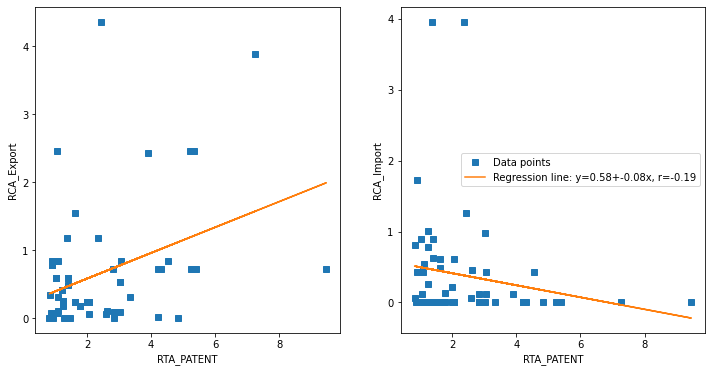

In [274]:
import numpy as np
import scipy.stats 

x = np.array(matcher['RTA_PATENT'])
y = np.array(matcher['rca_import'])
z = np.array(matcher['rca_ex'])

slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

slopes, intercepts, r, p, stderr = scipy.stats.linregress(x, z)
lines = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(x, z, linewidth=0, marker='s', label='Data points')
ax1.plot(x, intercepts + slopes * x, label=lines)
ax1.set_xlabel('RTA_PATENT')
ax1.set_ylabel('RCA_Export')
ax2.legend(facecolor='white')
scipy.stats.pearsonr(x, z) 
lines
ax2.plot(x, y, linewidth=0, marker='s', label='Data points')
ax2.plot(x, intercept + slope * x, label=line)
ax2.set_xlabel('RTA_PATENT')
ax2.set_ylabel('RCA_Import')
ax2.legend(facecolor='white')
scipy.stats.pearsonr(x, y) 
line 
plt.show()

<h5><span style="color:green">рост изобретательской активности имеет положительную связь с Экспортной деятельностю в России . По 1 графику видно: чем выще патентная активность тем выше RCA  экспорта <h5><span style="color:brown">и Наоборот: справа на графике чем ниже изобретательская активность -тем выше индекс импортной активности  (RCA импорта) 

<H3>PATENTS<H5>
    Статистика по выданным патентам, цитирорваниям и их совместному появлению а едином регистрационном  документе была полученя прямиком с помощью сервиса
<span style="color:orange">Google Patents </span> через платформу <span style="color:orange">Google Colaboratory </span> на оснвое языка запросов <span style="color:orange">BigQuery</span><br>.Документы включают полную коллекцию выданных патентов и опубликованных патентных заявок из каждой существующей базы данных по всему миру

Пример выгрузки патентов с кодом МПК начинающегося с <span style="color:green">F01K </span>которые совместно появлялись с подклассом <span style="color:red">F01B</span> начиная с 2011года ****fetching работает только на <span style="color:orange">Google Colaboratory** </span> **https://colab.research.google.com/drive/1xfXKoyiQVm1nt8vy66B18V8URhxLaL5F#scrollTo=6Ia5C2VLGC_A

In [17]:
pip install google.colab
from google.colab import auth
auth.authenticate_user()

%%bigquery --project canvas-verve-297310 HO4LF1

SELECT COUNT (distinct citation_publ)
from 
(SELECT patents.publication_number, cit.publication_number as citation_publ
FROM `patents-public-data.patents.publications` as patents, UNNEST(cpc) AS s, UNNEST(assignee_harmonized) as ah,unnest (citation) as cit
where 
	s.code like '%F01K%'
  AND PATENTS.filing_date>20110207
    )
where citation_publ in 
(

SELECT 
CITATIONPATENTS
FROM (
SELECT patents.publication_number,
 cit.publication_number AS CITATIONPATENTS
FROM `patents-public-data.patents.publications` as patents, UNNEST(cpc) AS s, UNNEST(assignee_harmonized) as ah,unnest (citation) as cit
where 
	s.code like 
'%F01B%'
  AND PATENTS.filing_date>20110207
)PUBLS

)

SyntaxError: invalid syntax (3143742297.py, line 1)

Загрузка готовых данных по инетерсующим нас патентам 2020 года  

In [175]:
url = "https://raw.githubusercontent.com/bulattoolpix/SITC/main/patentamt20.csv" 
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [176]:
df

,CODE,WORLD_AMT,RUS_AMT,rus_total,worldtotal
0,F01B,6847,89,112755,22657984
1,F01C,12350,187,112755,22657984
2,F01D,120807,388,112755,22657984
3,F01K,26271,178,112755,22657984
4,F01L,28818,67,112755,22657984
...,...,...,...,...,...
76,F41J,4169,59,112755,22657984
77,F41H,18929,397,112755,22657984
78,F42B,22282,804,112755,22657984
79,F42C,4450,118,112755,22657984


**Расчет Revealed Technology Advantage**

In [177]:

rus = []
for i in range(len(df)):
    a = (df.iloc[:, 2][i]/df.iloc[:, 3][i])
    rus.append(a)
df['share_ru'] = rus
wrld = []
for i in range(len(df)):
    a = (df.iloc[:, 1][i]/df.iloc[:, 4][i])
    wrld.append(a)    
df['share_wrld'] = wrld 
rta = []
for i in range(len(df)):
    a = (df.iloc[:, 5][i]/df.iloc[:, 6][i])
    rta.append(a)
df['RTA_RU'] = rta

In [178]:
df

,CODE,WORLD_AMT,RUS_AMT,rus_total,worldtotal,share_ru,share_wrld,RTA_RU
0,F01B,6847,89,112755,22657984,0.000789,0.000302,2.612012
1,F01C,12350,187,112755,22657984,0.001658,0.000545,3.042707
2,F01D,120807,388,112755,22657984,0.003441,0.005332,0.645394
3,F01K,26271,178,112755,22657984,0.001579,0.001159,1.361535
4,F01L,28818,67,112755,22657984,0.000594,0.001272,0.467193
...,...,...,...,...,...,...,...,...
76,F41J,4169,59,112755,22657984,0.000523,0.000184,2.843843
77,F41H,18929,397,112755,22657984,0.003521,0.000835,4.214522
78,F42B,22282,804,112755,22657984,0.007131,0.000983,7.250824
79,F42C,4450,118,112755,22657984,0.001047,0.000196,5.328530


<h3>Proximity Matrix

На основе полученной статистики именно совместного появления с 2011 года,была построена Матрица близости двух подклассов патентов составленная путем расчета <span style="color:green">Cosine similarity</span> then gives a useful measure of how similar two documents are likely to be, in terms of their subject matter, and independently of the length .

In [92]:
m='https://raw.githubusercontent.com/bulattoolpix/SITC/main/patentcosine2_.csv'
rc = requests.get(m).content
matrix= pd.read_csv(io.StringIO(rc.decode('utf-8')))

matrix.columns= matrix.columns.str.replace('\t\nF01K','F01K')
matrix.columns= matrix.columns.str.replace('\t\nF01K','F01K')
matrix.columns= matrix.columns.str.replace('\t\nF03G','F03G')
matrix.columns= matrix.columns.str.replace('F41H.1','F41H')
matrix=matrix.replace('\t\nF03G','F03G')
matrix=matrix.replace('\t\nF01K','F01K')
matrix=matrix.replace('F41H.1','F41H')
##matrix['Unnamed: 0'] = matrix['Unnamed: 0'].map({'\t\nF03G': 'F03G'})


matrix.set_index('Unnamed: 0', inplace=True)
matrix= matrix.replace({'0.00000001!': 1})
matrix=matrix.astype(np.float)
matrix

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


,F01B,F01C,F01D,F01K,F01L,F01M,F01N,F01P,F02B,F02C,...,F41B,F41C,F41F,F41H,F41G,F41J,F41H,F42B,F42C,F42D
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
F01B,1.000000,0.038522,0.007646,0.046881,0.051899,0.016802,0.012136,0.020914,0.069441,0.018491,...,0.000217,0.000123,0.000203,0.000389,0.000112,0.000088,0.000389,0.000511,0.000208,0.000350
F01C,0.038522,1.000000,0.011786,0.027794,0.013948,0.015110,0.005349,0.008518,0.036875,0.014514,...,0.000266,0.000204,0.000101,0.000437,0.000094,0.000045,0.000437,0.000520,0.000137,0.000338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F42C,0.000208,0.000137,0.000835,0.000321,0.000086,0.000029,0.000140,0.000146,0.000133,0.000484,...,0.017135,0.012066,0.044524,0.021914,0.027491,0.010735,0.021914,0.170844,1.000000,0.120166
F42D,0.000350,0.000338,0.000503,0.000542,0.000109,0.000097,0.000298,0.000114,0.000257,0.000578,...,0.011861,0.005503,0.011560,0.048157,0.003939,0.007057,0.048157,0.085213,0.120166,1.000000


In [93]:
edge_list =matrix.unstack()
edge_list.columns = ["P1","P2","weight"]
edge_list

      Unnamed: 0
F01B  F01B          1.000000
      F01C          0.038522
                      ...   
F42D  F42C          0.120166
      F42D          1.000000
Length: 6561, dtype: float64

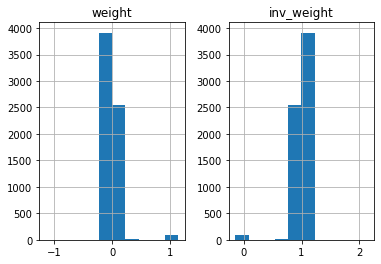

In [94]:
edge_list = edge_list.reset_index()
edge_list.columns = ["P1","P2","weight"]
edge_list["inv_weight"] = 1 - edge_list['weight']
edge_list[["weight","inv_weight"]].hist();

**Присваиваем кодам МПК ребер- их названия**

In [ ]:
edge_list= edge_list.replace({'F01B': 'MACHINES OR ENGINES'})
edge_list= edge_list.replace({'F01C': 'ROTARY-PISTON'})
edge_list= edge_list.replace({'F01K': 'STEAM ENGINE PLANTS'})
edge_list= edge_list.replace({'\t\nF01K': 'STEAM ENGINE PLANTS'})
edge_list= edge_list.replace({'F02B': 'INTERNAL-COMBUSTION PISTON ENGINES'})
edge_list= edge_list.replace({'F02C': 'GAS-TURBINE PLANTS'})
edge_list= edge_list.replace({'F02G': 'HOT-GAS OR COMBUSTION-ENGINE PLANTS'})
edge_list= edge_list.replace({'F02K': 'JET-PROPULSION PLANTS'})
edge_list= edge_list.replace({'F03B': 'MACHINES OR ENGINES FOR LIQUIDS'})
edge_list= edge_list.replace({'F03D': 'WIND MOTORS'})
edge_list= edge_list.replace({'F03G': 'SPRING, WEIGHT, INERTIA, OR LIKE MOTORS'})
edge_list= edge_list.replace({'F04B': 'POSITIVE-DISPLACEMENT MACHINES FOR LIQUIDS PUMPS'})
edge_list= edge_list.replace({'F04D': 'NON-POSITIVE-DISPLACEMENT PUMPS'})
edge_list= edge_list.replace({'F04F': 'PUMPING OF FLUID BY DIRECT CONTACT'})
edge_list= edge_list.replace({'F15C':'FLUID-CIRCUIT ELEMENTS FOR COMPUTING OR CONTROL'})            
edge_list= edge_list.replace({'F15D':'FLUID DYNAMICS'})
edge_list= edge_list.replace({'F17B': 'GAS-HOLDERS OF VARIABLE CAPACITY' })           
edge_list= edge_list.replace({'F17C': 'VESSELS FOR CONTAINING OR STORING COMPRESSED'})                
edge_list= edge_list.replace({'F22B':'STEAM GENERATION; STEAM BOILERS'})            
edge_list= edge_list.replace({'F22D':'PREHEATING, OR ACCUMULATING'})          
edge_list= edge_list.replace({'F22G':'PREHEATING, OR ACCUMULATING'})            
edge_list= edge_list.replace({'F23B':'APPARATUS FOR COMBUSTION SOLID FUEL'})            
edge_list= edge_list.replace({'F23C': 'APPARATUS FOR COMBUSTION FLUID FUEL'})             
edge_list= edge_list.replace({'F23Q': 'IGNITION '            })            
edge_list= edge_list.replace({'F24B': 'APPARATUS FOR COMBUSTION FLUID FUEL'})           
edge_list= edge_list.replace({'F24D': 'DOMESTIC- OR SPACE-HEATING SYSTEMS'})                 
edge_list= edge_list.replace({'F24T':'GEOTHERMAL COLLECTORS; GEOTHERMAL SYSTEMS'})                        
edge_list= edge_list.replace({'F24V':'COLLECTION, PRODUCTION OR USE OF HEAT' })                         
edge_list= edge_list.replace({'F25J': 'LIQUEFACTION, SOLIDIFICATION OF GASES' })                        
edge_list= edge_list.replace({'F41A':'FUNCTIONAL FEATURES OR DETAILS' })                                      
edge_list= edge_list.replace({'F41B':'WEAPONS FOR PROJECTING MISSILES '   })                               
edge_list= edge_list.replace({'F41C': 'SMALLARMS, e.g. PISTOLS OR RIFLES'  })                             
edge_list= edge_list.replace({'F41F':'HARPOON GUNS'     })        
edge_list= edge_list.replace({'F41G':'WEAPON SIGHTS; AIMING '})
edge_list= edge_list.replace({'F41H':'ARMOUR; ARMOURED TURRETS'})        
edge_list= edge_list.replace({'F41G':'WEAPON SIGHTS; AIMING'})                   
edge_list= edge_list.replace({'F42B': 'EXPLOSIVE CHARGES'})           
edge_list= edge_list.replace({'F42C': 'AMMUNITION FUZES' })             
edge_list= edge_list.replace({'F42D': 'BLASTING'})        
edge_list= edge_list.replace({'H03B': 'GENERATION OF OSCILLATIONS'})                            
edge_list= edge_list.replace({'H03C':'MODULATION'})
edge_list= edge_list.replace({'H03H': 'IMPEDANCE NETWORKS'})                                                      
edge_list= edge_list.replace({'H03J':'TUNING RESONANT CIRCUITS'})     
edge_list= edge_list.replace({'H05C':'ELECTRIC CIRCUITS FOR KILLING LIVING BEINGS' })
edge_list= edge_list.replace({'H05F':'STATIC ELECTRICITY'})  
edge_list= edge_list.replace({'H05G':'X-RAY TECHNIQUE ' })
edge_list= edge_list.replace({'H05H': 'PLASMA TECHNIQUE' })

In [11]:
import networkx as nx
from numba import jit
import networkx as nx
from bokeh.io import output_notebook
%matplotlib inline
output_notebook()

Loading BokehJS ...

In [123]:
edge_list

,P1,P2,weight,inv_weight
0,MACHINES OR ENGINES,MACHINES OR ENGINES,1.000000,0.000000
1,MACHINES OR ENGINES,ROTARY-PISTON,0.038522,0.961478
...,...,...,...,...
6559,BLASTING,AMMUNITION FUZES,0.120166,0.879834
6560,BLASTING,BLASTING,1.000000,0.000000


In [120]:
ps_weight=pd.DataFrame(data=edge_list) 
ps_weight

,P1,P2,weight,inv_weight
0,MACHINES OR ENGINES,MACHINES OR ENGINES,1.000000,0.000000
1,MACHINES OR ENGINES,ROTARY-PISTON,0.038522,0.961478
...,...,...,...,...
6559,BLASTING,AMMUNITION FUZES,0.120166,0.879834
6560,BLASTING,BLASTING,1.000000,0.000000


In [125]:
print("# of Nodes: {}".format(ps.number_of_nodes()))
print("# of Edges: {}".format(ps.number_of_edges()))


# of Nodes: 78
# of Edges: 1634


In [126]:
nd=pd.DataFrame(ps.nodes)
pd.set_option('display.max_rows', 10)
nd

In [129]:
##Присваиваем Центрам Вершин значения RTA
n='https://raw.githubusercontent.com/bulattoolpix/SITC/main/nodesize5.csv'
nn = requests.get(n).content
psnodesdf= pd.read_csv(io.StringIO(nn.decode('utf-8')))

In [130]:
pd.set_option('display.max_rows', 5)
psnodesdf

,node,nodesize,nodecolor
0,MACHINES OR ENGINES,2.61,red
1,H03D,1.47,red
...,...,...,...
76,WEAPONS FOR PROJECTING MISSILES,5.39,red
77,F24S,0.50,black


In [69]:
ps_edges=pd.DataFrame(ps.edges)
psnodesdf1=ps_edges

In [79]:
ps_gedges =psnodesdf1
ps_gedges = ps_gedges.rename({0: 'P1'}, axis=1)
ps_gedges = ps_gedges.rename({1: 'P2'}, axis=1)

In [80]:
result = pd.merge(ps_gedges, edge_list, on=['P1', 'P2'])
edge=result

<h2>Построение Минимального Остовного Дерева 

In [164]:
g = nx.from_pandas_edgelist(edge_list, source="P1", target="P2", 
edge_attr=["weight", "inv_weight"])
print("# of Nodes: {}".format(g.number_of_nodes()))
print("# of Edges: {}".format(g.number_of_edges()))

mst = nx.minimum_spanning_tree(g, weight='weight') 
print("# of Nodes: {}".format(mst.number_of_nodes())) 
print("# of Edges: {}".format(mst.number_of_edges()))

# Построить максимальное связующее дерево + сохранить ребра> 0.50- #
ps = nx.Graph()
#Add MST ('weight' attribute only)
for u,v,w in mst.edges(data=True):
    ps.add_edge(u,v,attr_dict={'weight' : w["weight"]})
#Add Edges > 0.50
for u,v,w in g.edges(data=True):
    if w['weight'] >= 0.0212:
        ps.add_edge(u,v,attr_dict={'weight' : w["weight"]})

# of Nodes: 78
# of Edges: 3081
# of Nodes: 78
# of Edges: 77


In [101]:
##edgecopy=edge_list
ps_gedges=pd.DataFrame(data=g.edges)
ps_gedges

,0,1
0,MACHINES OR ENGINES,MACHINES OR ENGINES
1,MACHINES OR ENGINES,ROTARY-PISTON
...,...,...
3079,AMMUNITION FUZES,BLASTING
3080,BLASTING,BLASTING


In [109]:
edge_list

,P1,P2,weight,inv_weight
0,MACHINES OR ENGINES,MACHINES OR ENGINES,1.000000,0.000000
1,MACHINES OR ENGINES,ROTARY-PISTON,0.038522,0.961478
...,...,...,...,...
6559,BLASTING,AMMUNITION FUZES,0.120166,0.879834
6560,BLASTING,BLASTING,1.000000,0.000000


In [166]:
reviews = []
for i in edge['weight']:
    if i>= -1.145764 and i <= 0.000223 :
        reviews.append('black')
    elif  i >0.000223 and i  <= 0.000887  : 
        reviews.append('black')
    elif  i >0.000887 and i  <= 0.00228  : 
        reviews.append('black')
    elif  i >0.00228  and i  <= 1.148832  : 
        reviews.append('purple')
        
edge['chord']=reviews 

In [172]:
reviews = []

for i in psnodesdf['nodecolor']:
    if i == 'red':
           reviews.append('black')
    else : reviews.append('red')
        
psnodesdf['nodecolor']=reviews 

<h3>размеры нодов в зависимости от меры значения RTA

<h2>Minimum spanning Tree 'Spring Layout'

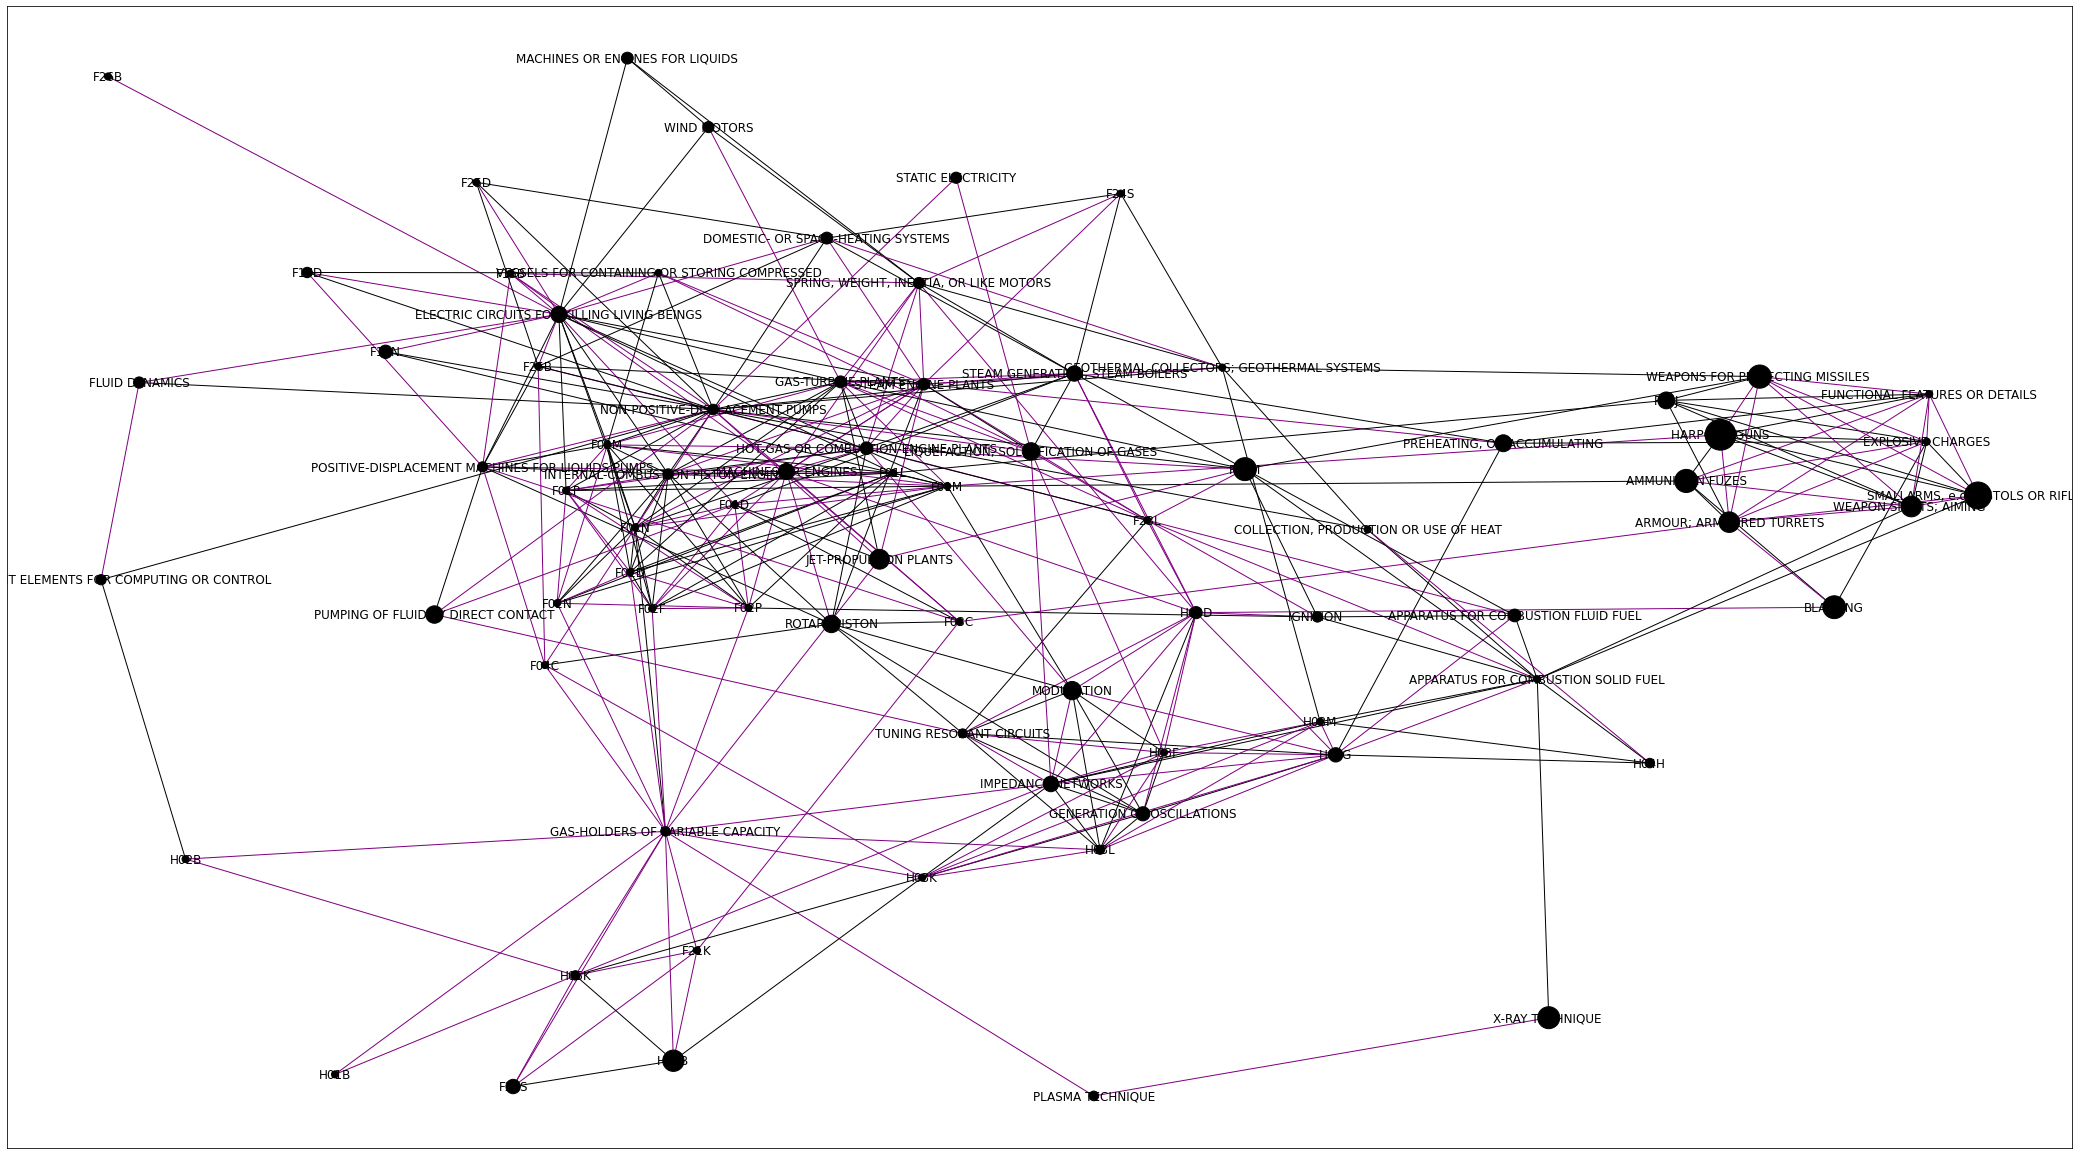

In [184]:
fig = plt.figure(figsize=(37,21))
ax = fig.gca()
nx.draw_networkx(ps,pos = nx.nx.spring_layout(ps), 
ax=ax, 
node_size=psnodesdf.nodesize	*100,
node_color=psnodesdf.nodecolor
,edge_color=edge.chord, width=1)

